# Setup

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import authentic_performance as ap
from scipy.stats import uniform
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import shutil

In [3]:
def power_law(x, a=1):
    return (1/x)**a

# GLOBAL VARIABLES FOR ALL DATASETS
LEN_TRAIN_DATASET = 100
LEN_TEST_DATASET = 100
LIST_FRAUD_PROBABILITIES = [round(x,2) for x in list(np.linspace(0,1,11))]
N = 100
P = 10/N
DISTRIBUTION = uniform
DECREASING_FUNCTION = lambda x : power_law(x, 3)
FRAUDSTER_INDEX = round(N/2)
ITERATIONS = 1000

In [4]:
def clean_dataDirectory():
    root = "data/synthetic-dataset/"
    for dir_net in list(os.walk(root))[0][1]:
        dir_datasets = (list(os.walk(os.path.join(root, dir_net)))[0][1])
        for dataset in dir_datasets:
            dataset_path = os.path.join(root, dir_net, dataset)
            print("Cleaning :", dataset_path)
            for file in list(os.walk(dataset_path))[0][2]:
                os.remove(os.path.join(dataset_path, file))
            shutil.rmtree(dataset_path)

def create_dataDirectoryArchitecture():
    for d in list(os.walk('data/synthetic-dataset/'))[0][1]:
        if "no-fraudster" in d:
            os.mkdir(os.path.join('data/synthetic-dataset/', d, 'train'))
        os.mkdir(os.path.join('data/synthetic-dataset/', d, 'test'))
        if d not in ['random-net-no-fraudster', "fitted-net-no-fraudster"]:
            for proba in LIST_FRAUD_PROBABILITIES:
                os.mkdir(os.path.join('data/synthetic-dataset/', d, 'test', str(proba)))
                
def visualize_network(path):
    with open(path, "rb") as f:
        G = pickle.load(f)
    plt.figure(figsize=(18,6))
    plt.subplot(131)
    nx.draw_networkx(G, node_size=np.array(list(dict(G.in_degree()).values()))*10, width=0.33, font_size=6)
    plt.title("Node size : in-degree")
    plt.subplot(132)
    plt.title("Node size : degree")
    nx.draw_networkx(G, node_size=np.array(list(dict(G.degree()).values()))*10, width=0.33, font_size=6)
    plt.subplot(133)
    plt.title("Ego network")
    nx.draw_networkx(nx.ego_graph(G, FRAUDSTER_INDEX, undirected=True), width=0.33)

# clean_dataDirectory()
# create_dataDirectoryArchitecture()

Cleaning : data/synthetic-dataset/strength-net-malicious-fraudster/test
Cleaning : data/synthetic-dataset/strength-net-no-fraudster/train
Cleaning : data/synthetic-dataset/strength-net-no-fraudster/test
Cleaning : data/synthetic-dataset/random-net-malicious-fraudster/test
Cleaning : data/synthetic-dataset/random-net-no-fraudster/train
Cleaning : data/synthetic-dataset/random-net-no-fraudster/test
Cleaning : data/synthetic-dataset/fitted-net-no-fraudster/train
Cleaning : data/synthetic-dataset/fitted-net-no-fraudster/test
Cleaning : data/synthetic-dataset/random-net-dumb-fraudster/test
Cleaning : data/synthetic-dataset/strength-net-dumb-fraudster/test


# Dataset creation

In [5]:
# random-net-no-fraudster

def generate_graph():
    return ap.generate_network(N,
                        P,
                        distribution=DISTRIBUTION,
                        fraud=False,
                        fraudster_index=None,
                        fraudster_strength=None,
                        fraud_probability=None,
                        strength_scheme=False,
                        iterations=0,
                        decreasing_function=None,
                        fraud_scheme=None)

for i in range(LEN_TRAIN_DATASET):
    G = generate_graph()
    with open(f'data/synthetic-dataset/random-net-no-fraudster/train/G_{i}.pickle', "wb") as f:
        pickle.dump(G, f)

for i in range(LEN_TEST_DATASET):
    G = generate_graph()
    with open(f'data/synthetic-dataset/random-net-no-fraudster/test/G_{i}.pickle', "wb") as f:
        pickle.dump(G, f)

del generate_graph

In [6]:
# random-net-dumb-fraudster

def generate_graph(fraud_probability):
    return ap.generate_network(N,
                        P,
                        distribution=DISTRIBUTION,
                        fraud=True,
                        fraudster_index=FRAUDSTER_INDEX,
                        fraudster_strength=None,
                        fraud_probability=fraud_probability,
                        strength_scheme=False,
                        iterations=0,
                        decreasing_function=None,
                        fraud_scheme=None)
    
for fraud_proba in LIST_FRAUD_PROBABILITIES:
    for i in range(LEN_TEST_DATASET):
        G = generate_graph(fraud_proba)
        with open(f'data/synthetic-dataset/random-net-dumb-fraudster/test/{fraud_proba}/G_{i}.pickle', "wb") as f:
            pickle.dump(G, f)

del generate_graph

In [7]:
# random-net-malicious-fraudster

def generate_graph(fraud_probability):
    return ap.generate_network(N,
                        P,
                        distribution=DISTRIBUTION,
                        fraud=True,
                        fraudster_index=FRAUDSTER_INDEX,
                        fraudster_strength=None,
                        fraud_probability=fraud_probability,
                        strength_scheme=False,
                        iterations=0,
                        decreasing_function=DECREASING_FUNCTION,
                        fraud_scheme="strength")
    
for fraud_proba in LIST_FRAUD_PROBABILITIES:
    for i in range(LEN_TEST_DATASET):
        G = generate_graph(fraud_proba)
        with open(f'data/synthetic-dataset/random-net-malicious-fraudster/test/{fraud_proba}/G_{i}.pickle', "wb") as f:
            pickle.dump(G, f)

del generate_graph

In [8]:
# strength-net-no-fraudster
def generate_graph():
    return ap.generate_network(N,
                        P,
                        distribution=DISTRIBUTION,
                        fraud=False,
                        fraudster_index=None,
                        fraudster_strength=None,
                        fraud_probability=None,
                        strength_scheme=True,
                        iterations=ITERATIONS,
                        decreasing_function=DECREASING_FUNCTION,
                        fraud_scheme=None)
    
for i in range(LEN_TRAIN_DATASET):
    G = generate_graph()
    with open(f'data/synthetic-dataset/strength-net-no-fraudster/train/G_{i}.pickle', "wb") as f:
        pickle.dump(G, f)
for i in range(LEN_TEST_DATASET):
    G = generate_graph()
    with open(f'data/synthetic-dataset/strength-net-no-fraudster/test/G_{i}.pickle', "wb") as f:
        pickle.dump(G, f)

del generate_graph

In [9]:
# strength-net-dumb-fraudster

def generate_graph(fraud_probability):
    return ap.generate_network(N,
                        P,
                        distribution=DISTRIBUTION,
                        fraud=True,
                        fraudster_index=FRAUDSTER_INDEX,
                        fraudster_strength=None,
                        fraud_probability=fraud_probability,
                        strength_scheme=True,
                        iterations=ITERATIONS,
                        decreasing_function=DECREASING_FUNCTION,
                        fraud_scheme=None)

for fraud_proba in LIST_FRAUD_PROBABILITIES:
    for i in range(LEN_TEST_DATASET):
        G = generate_graph(fraud_proba)
        with open(f'data/synthetic-dataset/strength-net-dumb-fraudster/test/{fraud_proba}/G_{i}.pickle', "wb") as f:
            pickle.dump(G, f)

del generate_graph

In [10]:
# strength-net-malicious-fraudster

def generate_graph(fraud_probability):
    return ap.generate_network(N,
                        P,
                        distribution=DISTRIBUTION,
                        fraud=True,
                        fraudster_index=FRAUDSTER_INDEX,
                        fraudster_strength=None,
                        fraud_probability=fraud_probability,
                        strength_scheme=True,
                        iterations=ITERATIONS,
                        decreasing_function=DECREASING_FUNCTION,
                        fraud_scheme="strength")
    
for fraud_proba in LIST_FRAUD_PROBABILITIES:
    for i in range(LEN_TEST_DATASET):
        G = generate_graph(fraud_proba)
        with open(f'data/synthetic-dataset/strength-net-malicious-fraudster/test/{fraud_proba}/G_{i}.pickle', "wb") as f:
            pickle.dump(G, f)

del generate_graph

In [11]:
# fitted-net-no-fraudster

def generate_graph():
    return ap.generate_fittedUFCNetwork(N, alpha=1/3)

for i in range(LEN_TRAIN_DATASET):
    G = generate_graph()
    with open(f'data/synthetic-dataset/fitted-net-no-fraudster/train/G_{i}.pickle', "wb") as f:
        pickle.dump(G, f)
for i in range(LEN_TEST_DATASET):
    G = generate_graph()
    with open(f'data/synthetic-dataset/fitted-net-no-fraudster/test/G_{i}.pickle', "wb") as f:
        pickle.dump(G, f)

del generate_graph

# Staging

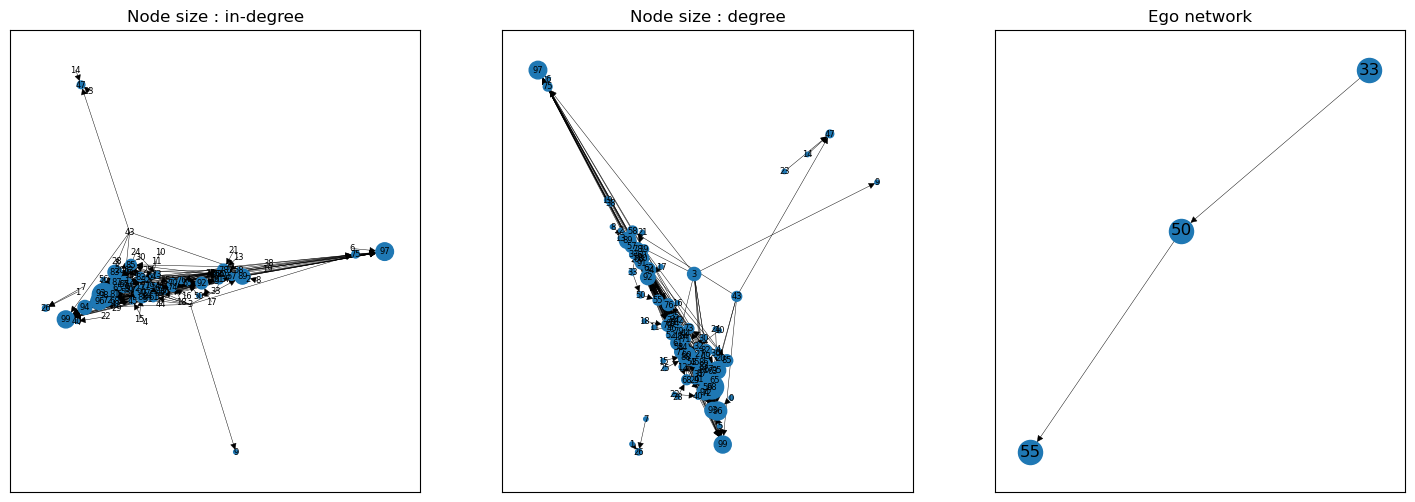

In [12]:
visualize_network(f'data/synthetic-dataset/fitted-net-no-fraudster/test/G_{99}.pickle')

# <>